# Visualize Training History.

Find the sweet spot in a NN loss and or accuracy score 

In [2]:
# Load library

import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [3]:
# Set random seed

np.random.seed(0)

In [4]:
# Set the number of features we want

number_features = 10000



In [5]:
# Load data and target vector from movie review data

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_features)

In [14]:
# Convert movie review data to a one hot encoded feature matrix

tokenizer = Tokenizer(num_words = number_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode = "binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode = "binary")

In [15]:
# Start NN

network = models.Sequential()

In [16]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 16, activation = "relu", input_shape = (number_features,)))

In [17]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 16, activation = "relu"))

In [18]:
# Add fully connected layer with a ReLU activation fuction.

network.add(layers.Dense(units = 1, activation = "sigmoid"))

In [19]:
# Comile NN

network.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [20]:
# Train NN

history = network.fit(features_train, target_train, epochs = 20, verbose = 1, batch_size = 1000, validation_data = (features_test, target_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 272us/step - loss: 0.5116 - accuracy: 0.7882 - val_loss: 0.4054 - val_accuracy: 0.8609
Epoch 2/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.3216 - accuracy: 0.8940 - val_loss: 0.3208 - val_accuracy: 0.8838
Epoch 3/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.2456 - accuracy: 0.9199 - val_loss: 0.3110 - val_accuracy: 0.8752
Epoch 4/20
25000/25000 [==============================] - 3s 140us/step - loss: 0.2046 - accuracy: 0.9303 - val_loss: 0.3050 - val_accuracy: 0.8764
Epoch 5/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.1760 - accuracy: 0.9408 - val_loss: 0.3039 - val_accuracy: 0.8788
Epoch 6/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.1549 - accuracy: 0.9468 - val_loss: 0.3278 - val_accuracy: 0.8694
Epoch 7/20
25000/25000 [==============================] - 3s 

In [26]:
# Get training and test loss histories

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [27]:
# Create count od the number of epochs

epoch_count = range(1, len(training_loss) +1)

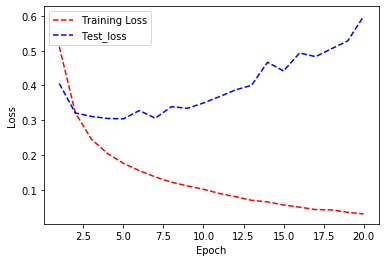

In [28]:
# Visualize loss history

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [31]:
# Get training and test accuracy histories 

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

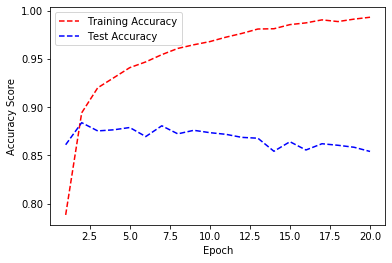

In [32]:
# Visualize the accuracy history 

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")

plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()